# Hierarchical Clustering

## Importing the libraries

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [31]:
dataset = pd.read_csv("Delhi_Climate.csv")

In [32]:
dataset.shape

(1576, 5)

In [33]:
dataset.drop(columns=['date'], inplace=True)

In [34]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1576 entries, 0 to 1575
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meantemp      1576 non-null   float64
 1   humidity      1576 non-null   float64
 2   wind_speed    1576 non-null   float64
 3   meanpressure  1576 non-null   float64
dtypes: float64(4)
memory usage: 49.4 KB


In [35]:
X = dataset.iloc[:,[0,1]].values

### Using the dendrogram to find the optimal number of clusters

Text(0, 0.5, 'Euclidian Distance')

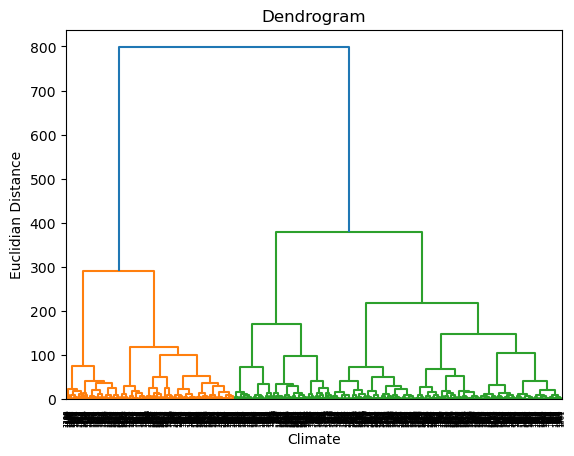

In [36]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X,method = 'ward'))
plt.title("Dendrogram")
plt.xlabel("Climate")
plt.ylabel("Euclidian Distance")

## Training the Hierarchical Clustering model on the dataset

In [37]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering (n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

In [38]:
print(y_hc)

[0 0 0 ... 1 1 1]


## Visualising the clusters

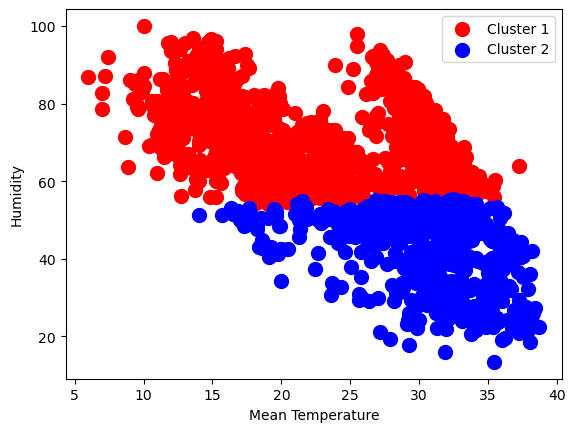

In [39]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.xlabel('Mean Temperature')
plt.ylabel('Humidity')
plt.legend()
plt.show()

## Test your Knowledge

### 1. For model we have created in lab sessions write following results

### Optimal no. of Clusters

In [40]:
colors=set(dendrogram['color_list'])
print('Optimal cluster number: ',len(colors)-1)

Optimal cluster number:  2


### Cluster Leaves

In [41]:
leaf_node=hc.children_
print('total number of cluster leaves= ',len(leaf_node))

total number of cluster leaves=  1575


### Rand Score

In [42]:
from sklearn.metrics import adjusted_rand_score
t_labels=X[:,1]
rand_score=adjusted_rand_score(t_labels,y_hc)
print('Rand Score= ',rand_score)

Rand Score=  0.001427691239473352


C:\Users\gaurav\anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)


### No. of connected components in Graph

In [43]:
print(hc.n_connected_components_)

1


### No. of features seen during fit

In [44]:
print(hc.n_features_in_)

2


### 2. Create model using following parameter setting and write down the result

### Linkage=Single, Metric=cosine

Text(0, 0.5, 'Cosine')

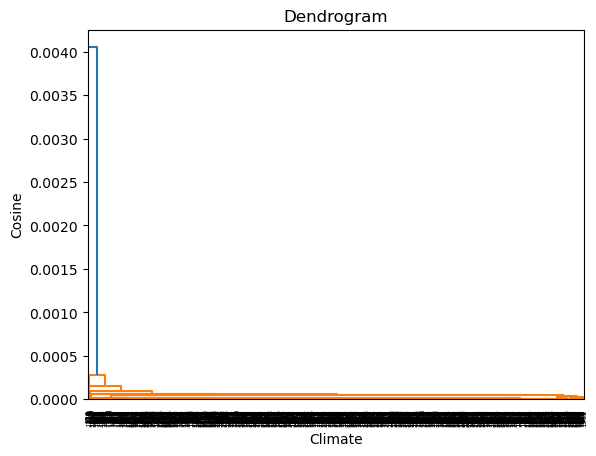

In [45]:
import scipy.cluster.hierarchy as sch_1
dendrogram= sch_1.dendrogram(sch_1.linkage(X,method='single',metric='cosine'))
plt.title("Dendrogram")
plt.xlabel('Climate')
plt.ylabel('Cosine')

### Optimal cluster Number

In [46]:
colors_1=set(dendrogram['color_list'])
print('Optimal cluster Number: ',len(colors_1)-1)

Optimal cluster Number:  1


In [47]:
from sklearn.cluster import AgglomerativeClustering
hc_1=AgglomerativeClustering(n_clusters=1,affinity='cosine',linkage='single')
y_hc_1=hc_1.fit_predict(X)

### Cluster Leaves

In [48]:
leaf_node2=hc_1.children_
print('total number of cluster leaves= ',len(leaf_node2))

total number of cluster leaves=  1575


### Rand Score

In [49]:
from sklearn.metrics import adjusted_rand_score
t_labels=X[:,1]
rand_score=adjusted_rand_score(t_labels,y_hc_1)
print('Rand Score= ',rand_score)

Rand Score=  0.0


C:\Users\gaurav\anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)


### No. of connected components in graph 

In [50]:
print(hc_1.n_connected_components_)

1


### No. of features seen during fit

In [51]:
print(hc_1.n_features_in_)

2
